# - Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow import keras
from tensorflow.keras import models
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
from scipy import ndimage as img
from scipy.ndimage.measurements import center_of_mass
import math
import warnings
warnings.filterwarnings('ignore')
import math
import time 
import random 
from sklearn import preprocessing
from matplotlib import pyplot as plt



# - Loading data


In [2]:
(x_train,y_train) , (x_test ,y_test) = keras.datasets.mnist.load_data()
#samples
x_train=x_train[:5000,:,:]
y_train=y_train[:5000]
x_test=x_test[:1000,:,:]
y_test=y_test[:1000]
#test=y_test
print(len(x_test))
print(len(x_train))

1000
5000


# - One hot vector


In [3]:
# Define the One-hot Encoder
ohe = preprocessing.OneHotEncoder()# Reshape data
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Fit and transform training data
ohe.fit(y_train)
y_train = ohe.transform(y_train).toarray()

# Fit and transform testing data
ohe.fit(y_test)
y_test = ohe.transform(y_test).toarray()

# Print results
print(f'Value with encoding: {y_test[1]}')


Value with encoding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# - print images


(28, 28)


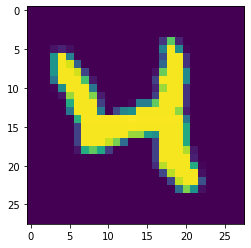

In [4]:
index=1
img=x_train[index]
print(img.shape)
plt.imshow(x_train[20])
plt.show()

# - split images


In [5]:
def imaged_grid(img , row , col ):
    """
    Input:
        img: 1D Image vector
        row: number of rows in the grid
        col: number of columns in the grid
    Output:
        reshaped image (2D)
    """
    x , y = img.shape

    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)
    
    return (img.reshape(x//row, row, -1,col)
            .swapaxes(1,2)
            .reshape(-1, row, col)) 

In [6]:
print(imaged_grid(x_test[9] ,2, 2 ).shape)
imaged_grid(x_test[9] , 2, 2 )

(196, 2, 2)


array([[[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0,   0]],

       [[  0,   0],
        [  0, 

# - extract features (centroid)

In [7]:
def get_centroid(img):
    
    """
    Input: 
        img: (2D) image
    
    Output: 
        feature vector of the img (np.array)
    """
    feature_vector = []
 
    for grid in imaged_grid(img ,4, 4) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
    
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
            feature_vector.append( Xc/ sum )
            feature_vector.append(Yc/ sum )
        else :
             feature_vector.append(0)
             feature_vector.append(0)
        
    
    return np.array(feature_vector)

# -print centroid of each box

[0 0]


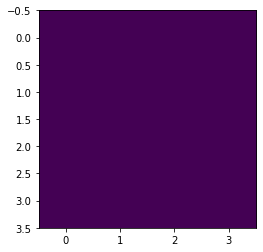

[0 0]


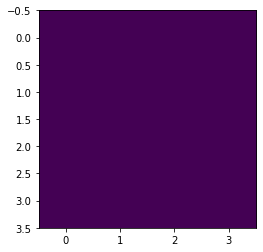

[0 0]


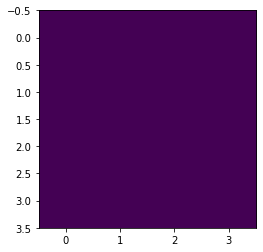

[0 0]


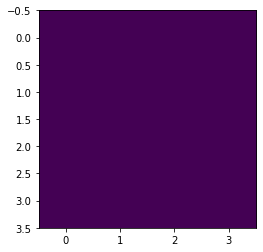

[0 0]


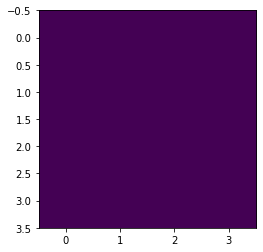

[0 0]


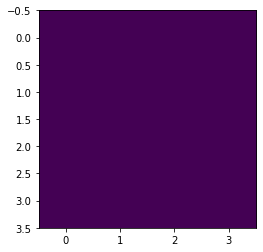

[0 0]


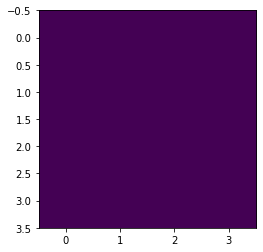

[0 0]


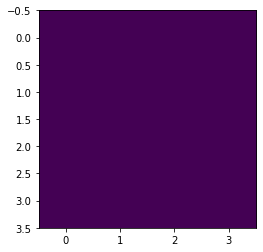

[0 0]


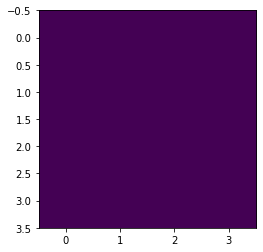

[0 0]


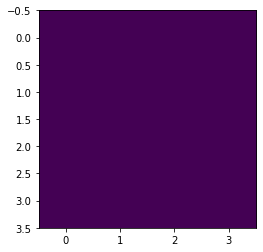

[3. 3.]


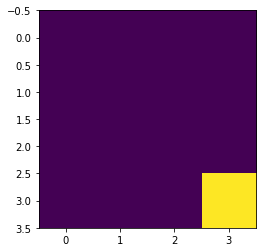

[1.47927136 0.80339196]


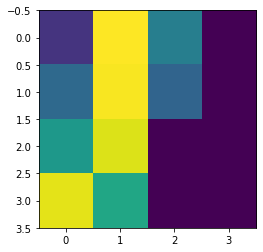

[0 0]


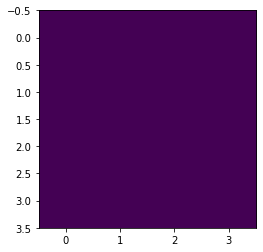

[0 0]


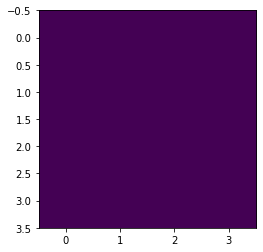

[0 0]


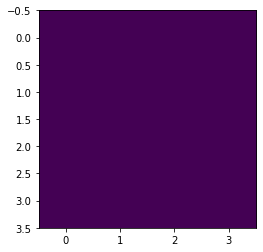

[0 0]


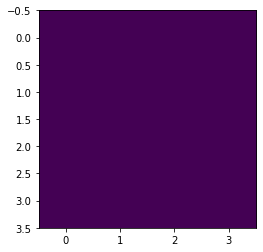

[0 0]


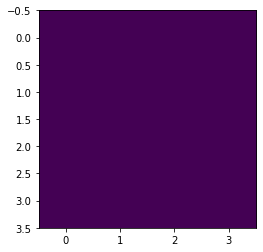

[1.9771987  2.86210641]


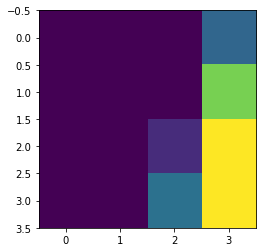

[1.3004158  0.07692308]


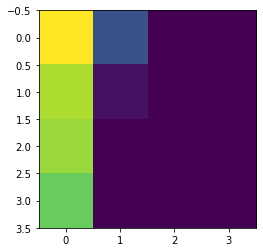

[0 0]


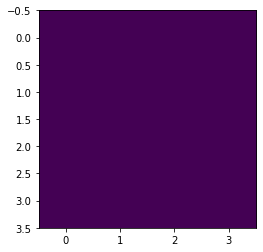

[0 0]


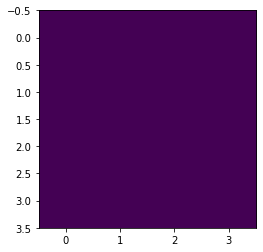

[0 0]


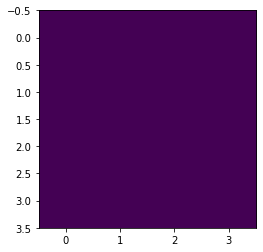

[0 0]


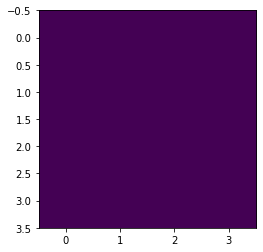

[0 0]


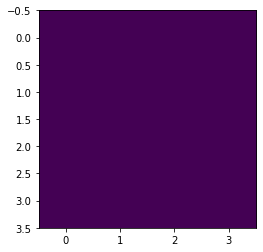

[1.59804426 2.18167782]


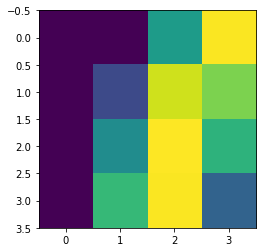

[0.09411765 0.        ]


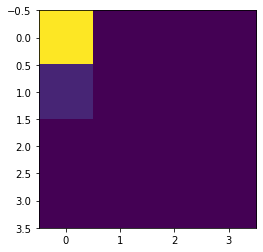

[0 0]


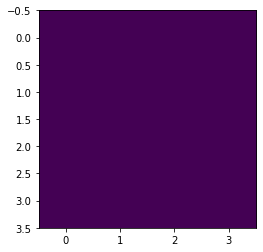

[0 0]


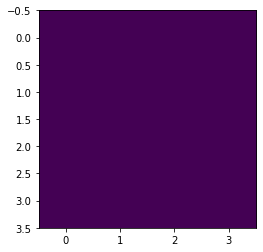

[0 0]


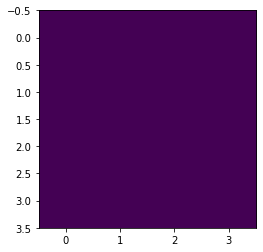

[0 0]


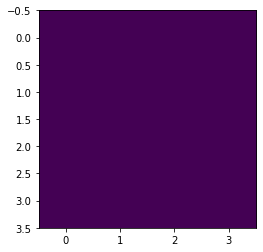

[0 0]


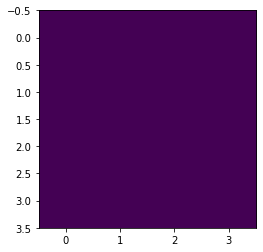

[1.55836112 1.02810862]


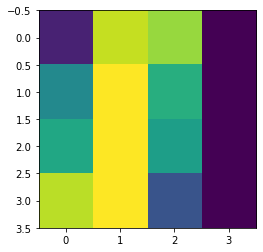

[0 0]


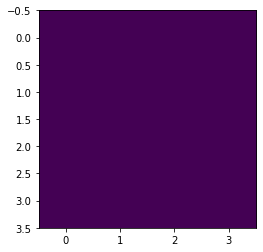

[0 0]


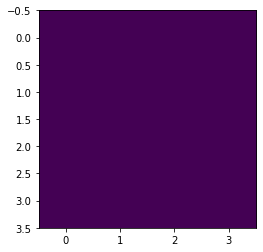

[0 0]


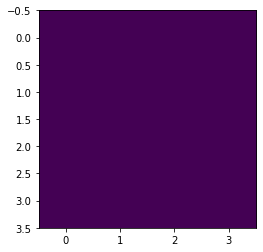

[0 0]


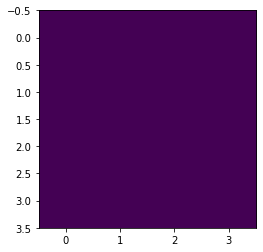

[0 0]


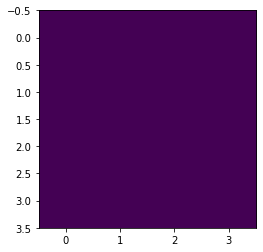

[1.9047619  2.97619048]


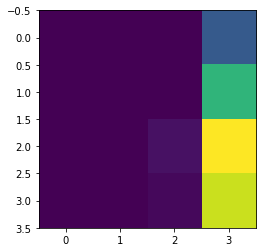

[1.11041405 0.45671267]


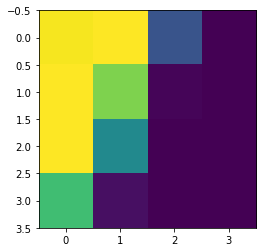

[0 0]


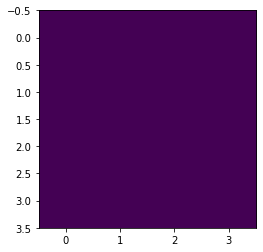

[0 0]


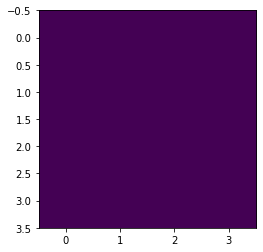

[0 0]


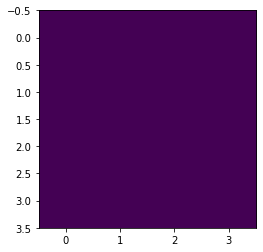

[0 0]


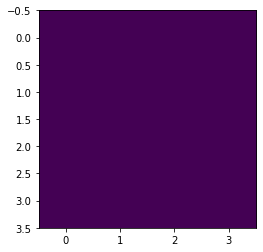

[0 0]


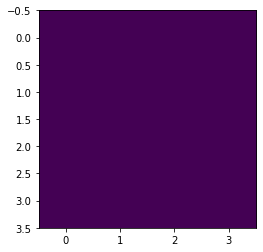

[0 0]


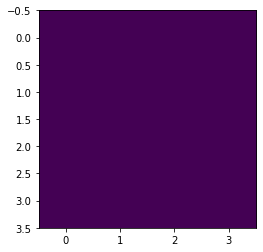

[0 0]


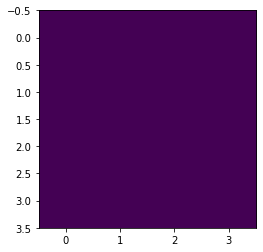

[0 0]


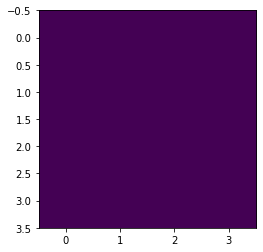

[0 0]


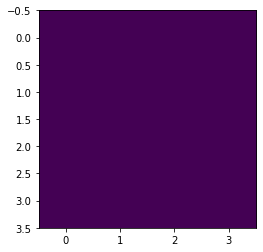

[0 0]


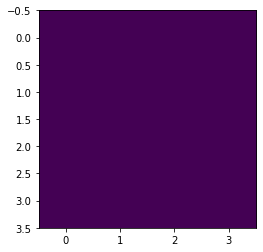

In [8]:
test=imaged_grid(x_test[2],4,4)
for i in test:
    print(get_centroid(i))
    plt.imshow(i)
    plt.show()

# - calculate feature vector

In [9]:
train_features = [get_centroid(img)  for img in x_train  ]
train_features = np.array(train_features)
train_features=train_features.reshape(train_features.shape[0], 98, 1)
print('shape of train feature vector:',train_features.shape)


test_features = [get_centroid(img)  for img in x_test  ]
test_features = np.array(test_features)
test_features=test_features.reshape(test_features.shape[0], 98, 1)

print('shape of test feature vector:',test_features.shape)

shape of train feature vector: (5000, 98, 1)
shape of test feature vector: (1000, 98, 1)


# - Neural network implementation 

In [10]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        raise 

In [11]:
class Layer2(Layer):
    def __init__(self, input_size, output_size ):
        self.input = None
        self.output = []
        self.weights = []
        
        self.weights = np.random.rand(input_size, output_size) -0.5
       
      
    def getWeights(self):
        """
        Inputs: 
            self: instance of class Layer2
        
        Outputs:
            return the weights 
        """
        return self.weights
    
    def forward_propagation(self, given_input):
        """
        Inputs:
            self: instance of class Layer2
        
        Outputs: 
            return the output of the network in forward propagation 
        """
        self.input = given_input
       
        self.output = []
        self.weights=np.array(self.weights)

        self.weights=self.weights.transpose()

        self.output = np.dot(self.weights, self.input)
                
        self.weights=self.weights.transpose()

        return self.output
    
    
    
    def backward_propagation(self, output_error, learning_rate):
        """
        Inputs:
            self: instance of class Layer2
            output_error: error in each layer 
            learning rate: step size of each iteration 
        
        Outputs: 
           input error: the multiplication of weights and error in the layer  
        """
        input_error = np.dot( self.weights,output_error)
        output_error=output_error.transpose()
        weights_error = np.dot(self.input,output_error)
       
        self.weights += learning_rate * weights_error
        
        return input_error

In [12]:

class Network:
    def __init__(self):
        self.layers = []

    def add(self, layer ):
        """
        Inputs:
            self: instance of class Network
            Layer: instance of class Layer
        """
        self.layers.append(layer )
    

        
    def predict(self, input_data):
        """
        Inputs:
            self: instance of class Network
            input_data: the data we need the system to predict (test data)
        Outputs:
            return predicted labels for the data
        """
        predicted = []
        for i in range( len(input_data) ):
            output = input_data[i]
         
            for layer in self.layers:
                output = layer.forward_propagation(output)
                
            predicted.append(output)

        return predicted

    def fit(self, x_train, y_train, epochs, learning_rate):
        """
        Inputs:
            self: instance of class Network
            x_train: images of training data
            y_train: labels of images in training data
            epochs: number of iterations
            learning_rate: step size of each iteration 
        """
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                error = 0
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                total=[]
               
                t1=0
                for k in range( len(output)): # not -1
                    t1+=y_train[j][k]-output[k]
                    total.append((y_train[j][k]-output[k]).tolist())
          
                err += t1
                error = np.array(total)
                # backward propagation
                for layer,t in zip(reversed(self.layers),range(len(self.layers))):
                    # print("Layer t ",t)
                    error = layer.backward_propagation(error, learning_rate)

            
            # calculate average error on all samples

            print('epoch %d/%d   err=%f' % (i+1, epochs, err))


In [13]:
class ActivationLayer(Layer):
    def __init__(self, activation,activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
         """
        Inputs:
            self: instance of class ActivationLayer
        
        Outputs: 
            return the output of the network in forward propagation 
        """
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output


    def backward_propagation(self, output_error, learning_rate):
       """
        Inputs:
            self: instance of class ActivationLayer
            output_error: error in each layer 
            learning rate: step size of each iteration 
        
        Outputs: 
           input error: the multiplication of weights and error in the activation layer  
        """
        return self.activation_prime(self.input,self.output)* output_error #deltaj

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivative(x):
     return sigmoid(x) * (1 - sigmoid(x))


NN = Network()

NN.add(Layer2(98, 30 ))
NN.add(ActivationLayer(sigmoid,derivative))
NN.add(Layer2(30, 15 ))
NN.add(ActivationLayer(sigmoid,derivative))
NN.add(Layer2(15, 10))
NN.add(ActivationLayer(sigmoid,derivative))
#NN.add(ActivationLayer(softmax,derivativeS))


NN.fit(train_features, y_train, epochs=100 ,learning_rate=0.01)

# test
out = NN.predict(test_features)

epoch 1/100   err=-1755.803013
epoch 2/100   err=-119.152915
epoch 3/100   err=-201.326527
epoch 4/100   err=-336.301819
epoch 5/100   err=-502.284171
epoch 6/100   err=-641.893148
epoch 7/100   err=-723.131243
epoch 8/100   err=-790.946436
epoch 9/100   err=-887.633723
epoch 10/100   err=-1008.283112
epoch 11/100   err=-1114.467076
epoch 12/100   err=-1181.823108
epoch 13/100   err=-1216.114071
epoch 14/100   err=-1233.592442
epoch 15/100   err=-1244.502486
epoch 16/100   err=-1251.519114
epoch 17/100   err=-1253.898555
epoch 18/100   err=-1250.138060
epoch 19/100   err=-1239.408889
epoch 20/100   err=-1222.398139
epoch 21/100   err=-1200.900102
epoch 22/100   err=-1176.440061
epoch 23/100   err=-1149.325485
epoch 24/100   err=-1119.002712
epoch 25/100   err=-1085.095945
epoch 26/100   err=-1048.011925
epoch 27/100   err=-1008.861787
epoch 28/100   err=-969.051783
epoch 29/100   err=-929.865729
epoch 30/100   err=-892.216762
epoch 31/100   err=-856.601808
epoch 32/100   err=-823.18392

In [15]:
out = NN.predict(test_features)

In [16]:
def get_max(arr):
    list=[]
    max=0
    index=0
    for i in range(len(arr)):
        max=0
        index=0
        for j in range(len(arr[i])):
            if(max<arr[i][j]):
                max=arr[i][j]
                index=j
        list.append(index)
    return list
     

In [17]:
correct=0
a=get_max(out)
b=get_max(y_test)
for i in range(len(test_features)):
    
    if(a[i]==b[i]):
        correct+=1
        
accuracy=(correct/len(test_features))*100
print(accuracy)
print(correct)

84.6
846
